<a href="https://colab.research.google.com/github/lalit-jamdagnee/Learning_ML/blob/main/Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Chapter we will start by looking at the Linear Regression model, one of the simplest models there is. We will discuss two very different ways to train it:

1. Using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set (i.e., the model paramters that minimize the cost function over the training set).

2. Using an iterative optimization approach like Gradient Descent that gradually improves the model's performance to minimize the cost function over the training set.

Next we will look at Polynomial Regression, a more complex model that can fix non-linear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case using learning curves, and then we will look at several regularization techniques that can reduce the risk of overfitting the training set.

Finally we will look at two more models that are commonly used for classification tasks: Logistic Regression and Softmax Regressions

# Linear Regression

*Linear Regression  model prediction*
```
y= θ0 + θ1.x1 + θ2.x2 +⋯+ θn.xn
```
In this equation:

  •  ŷ is the predicted value.

  •  n is the number of features.

  •  xi is the ith feature value.

  •  θj is the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn)


This is can be written much more concisely using the following vectorized form.

```
 y = hθ(x) = θ·x
```
In this equation:

* θ is the model’s parameter vector containing the bias term θ0 and the feature weights θ1 to θn.

* x is the instance’s feature vector containing x0 to xn, with x0 always equal to 1.

* θ · x is the dot product of the vectors θ and x, which is of course equal to θ0.xo  θ1,x1 + θ2.x2 + ... + θn.xn

* hθ is the hypothesis function, using the model parameters θ.

OK, that's theh LInear regression model- but how do we train it? Well, to train a linear regression model, we need to find the value of 0 that minimizes the loss function (RMSE or MSE, etc).

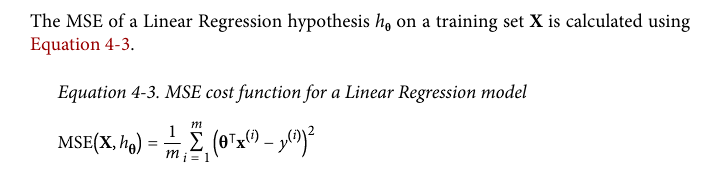

## The Normal Equation

To find the value of θ that minimizes the cost function, there is a **closed-form-solution** - in other words, a mathematical equation that gives the result directly. This is called the **Normal Equation**.

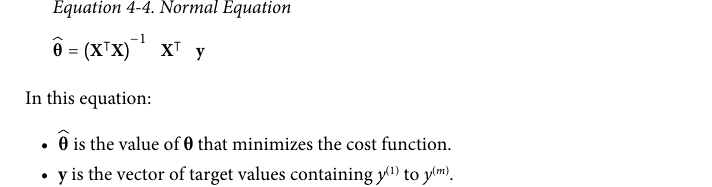

In [1]:
# Let's generate some linear-looking data to test this equation.

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Now let's compute θ using the Normal Equation. We will use the inv() function from NumPy's linear algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication.

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[3.69355541],
       [3.33908188]])

We would have hoped for  θ0 = 4 and θ1 = 3 instead of  θ0 = 4.215 and θ1 = 2.770.
Close enough, but the noise made it impossible to recover the exact parameters of the original function.

In [4]:
# Now we can make prediction for θ

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.69355541],
       [10.37171916]])

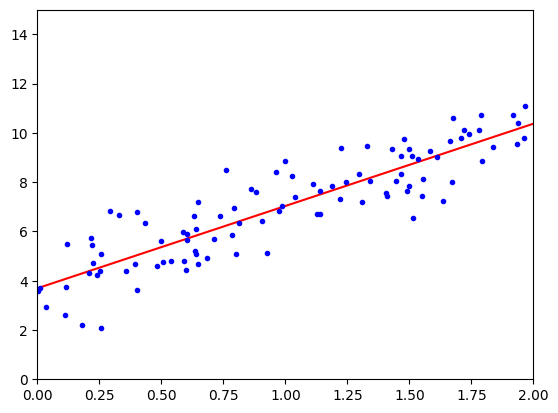

In [5]:
# Let's plot this model's prediction

import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
# Performing linear regression using scikit-learn is simple

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
print(lr.intercept_, lr.coef_)

[3.69355541] [[3.33908188]]


The Linear regression class is based on the scipy.linalg.lstq() function ( the name stands for "least squares"), which you could call directly:

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.69355541],
       [3.33908188]])

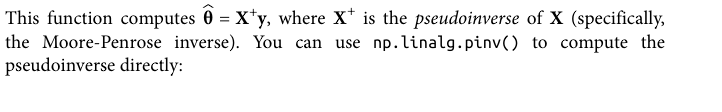

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[3.69355541],
       [3.33908188]])

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition* **(SVD)** that can decompose the training set matrix X into the matrix multiplication of three matrices. The pseudoinverse is computed as image.png

## Computational Complexity

The Normal Equation computes the inverse of image.png , which is an (n +1) x (n + 1) matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n^2.4) to O(n^3), depending on the implementation. In other words, if you double the number of features, you mutliply the computation time by roughly 2^2.4 = 5.3 to 2^3 = 8.

The SVD approach used by Scikit-Learn's LinearRegression class is about O(n^2). If you double the number of features, you multiply the computation time by roughly 4.

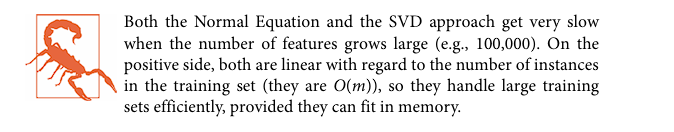

Also, once you have trained your Linear Regression model, predictions are very fast: the computational complexity is linear with regard to both the number of instances you want to make predictions on and the number of features. In other words, making predictions on twice as many instances(or twice as many features) will take roughly twice as much time.

Now we will look at a very different way to train a Linear Regression model, which is better suited for cases where there are a large number of features or too many training instances to fit in memory.

# Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea behind the Gradient Descent is to change parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountain in a dense fog, and you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regard to the parameter vector θ and it goes in the direction of descending gradient. ONce the gradient is zero, you have reached a minimum!

Concretely, you start by filling θ with random values (this is called *random initialization*).Then you improve it gradually taking one baby step at a time, each step attempting to decrease the cost function (eg. MSE, RMSE), until the algorithm convergest to the minimum.


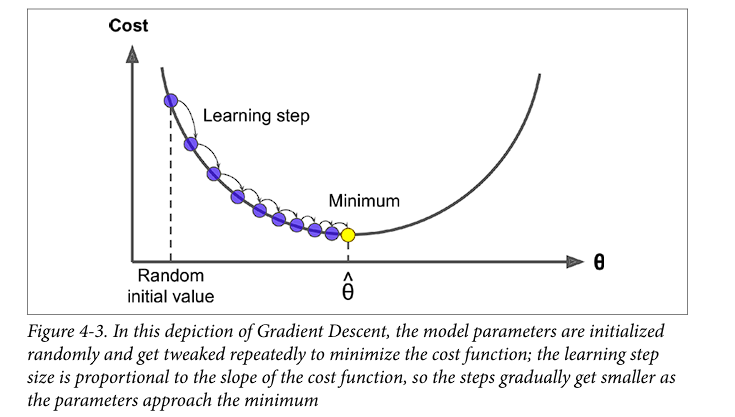

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then algorithm will have to go through many iterations to converge, which will take a long time.

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

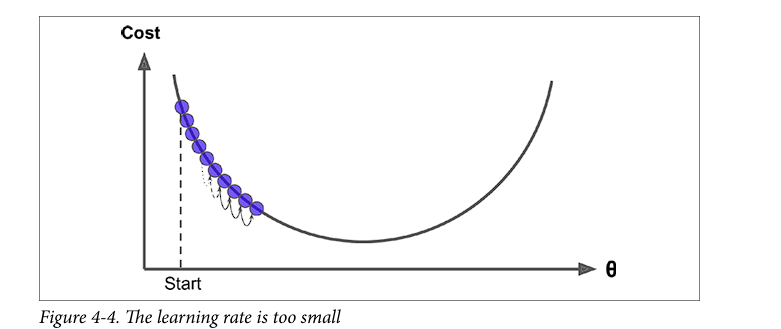

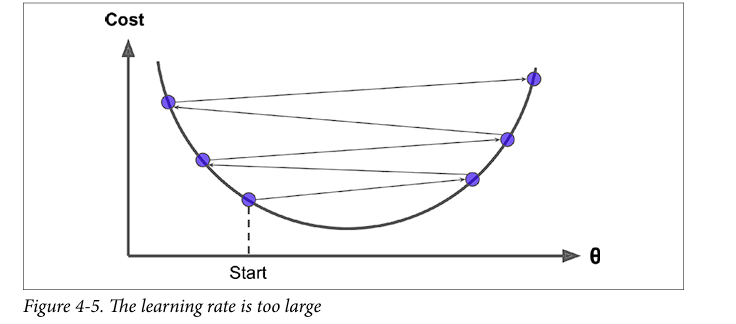

Finally, not all cost functions look like nice, regular bowls. There may beh oles, ridges, plateaus, and sorts of irregular terrains, making convergence to the minimum difficult. The following figure shows this:

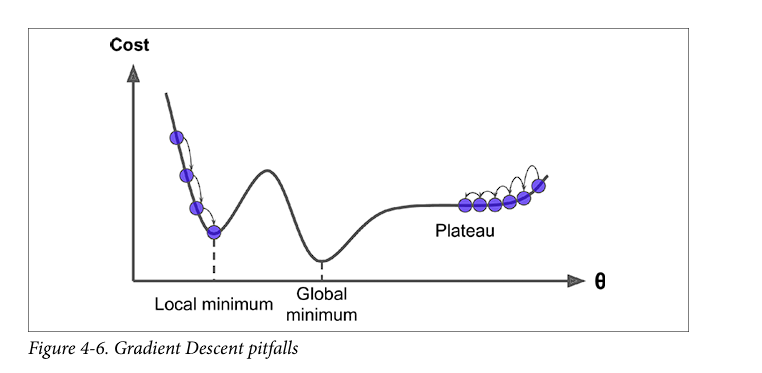

Fortunately, the MSE coset function for a Linear Regression model happens to be a convex function, which means it have no local minima only one global minimum.

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales.

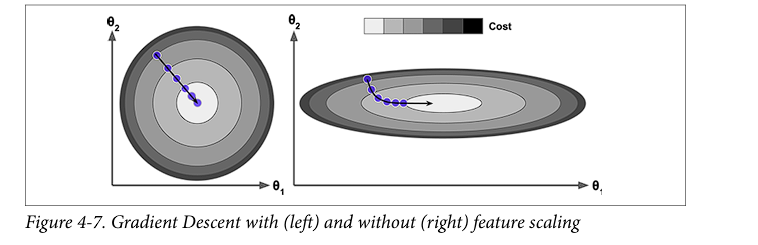

We can see, that on the left Gradient descent algorithm goes straight towards the minimum, thereby reaching it quickly, as compared to the right one. But both surely reaches to the minimum.

This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function. The more parameter a model has, the more dimensions this space has, and the harder the search is: seraching for a needle in a 300 dimensional haystack is much trickier than in 3 dimensions. Fortunately, since the cost function is convex in case of the Linear Regression, the needle is simply at the bottom of the bowl.

## Batch Gradient Descent

To implement Gradient Descent, you need to calculate how much the cost function will change if you change θj just a little bit. This is called a partial derivative. It is like asking "What is the slope of the mountain under my feet if I face east?" and then asking the same question facing north(and so on for all other dimensions). The following equation computes the partial derivates of the cost function with regard to parameter θj:


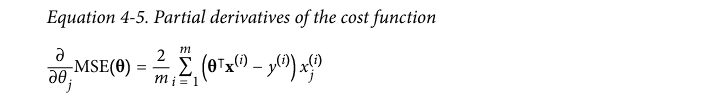

Instead of computing these partial derivatives individually, we can use the following equation of the Cost function(one for each model parameter).

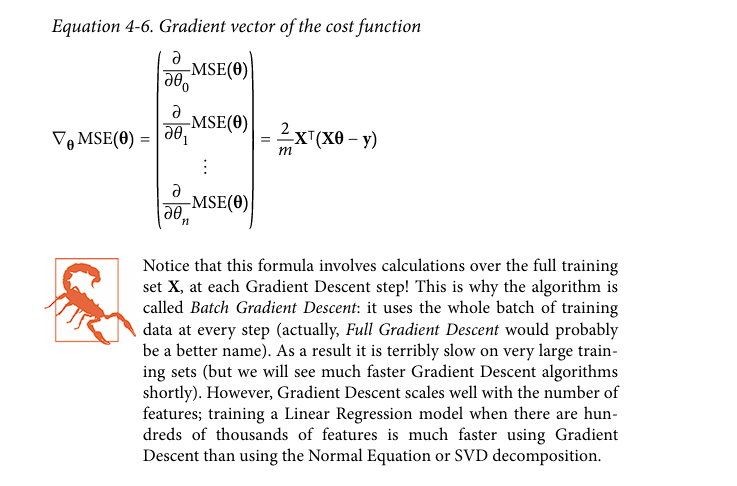

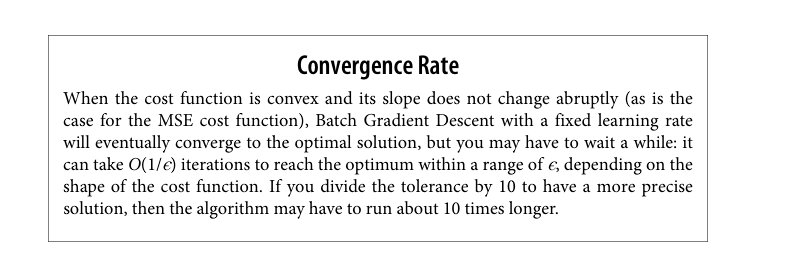

## Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. Whereas, *Stochastic Gradient Descent* picks arandom instance in the training set at every step and computes the gradients based only on theat single instance. Working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration.

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regualr than batch gradient Descent: instead of gently decreasing until it reaches the minimum, the cost functio will bounce up and down, decreasing only on average. Over time it will end up very close to the minium, but once it gets there it will continue to bounce around, never settling down.

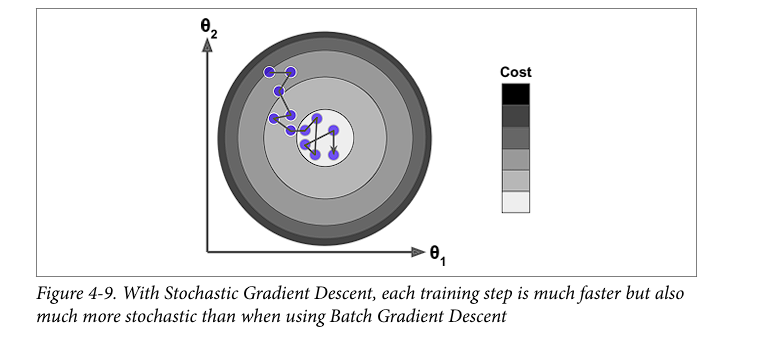

When the cost function is very irregular, this can actually help the algorithm juump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.


To perform Linear Regression using Stochastic GD with scikit-learn, we can use the SGDRegressor class, which defaults to optimizing the squared error cost function.

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [10]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.68314859] [3.3489203]


## Mini-batch Gradient Descent

It is simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients bsesd on the full training set(as in Batch GD), or based on just one instance (as in Stochastic GD), Mini-Batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

The Mini-batch GD will end up closer to the minimum than Stochastic GD- but it may be harder for it to escape from the local minima.

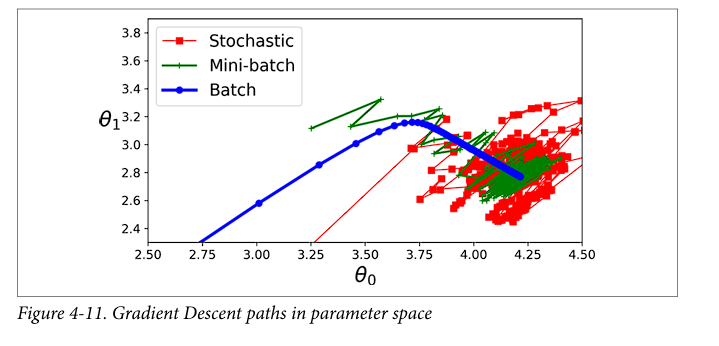

Let's compare the algorithms we've discussed so far for Linear Regression:
( m is the number of training instances and n is the number of features)



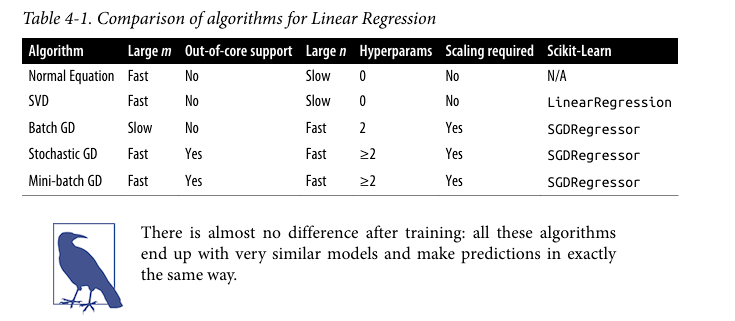


# Polynomial Regression

What if your data is more complex than a straight line? surprisingly, you can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called **Polynomial Regression**.

Let's look at an example. First, let's generate some nonlinear data, based on a simple quadratic equation:

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

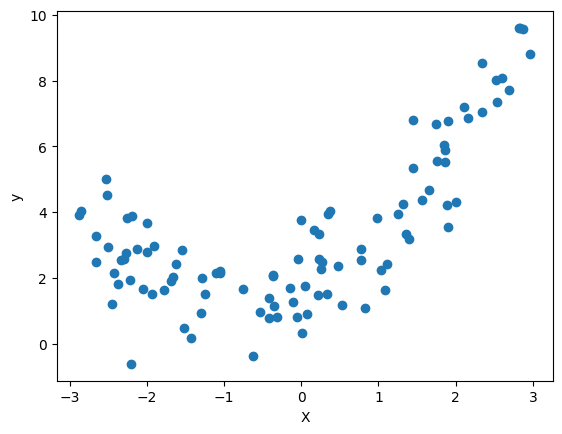

In [12]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

A straight line will never fit this data properly. So let's use Scikit-Learn's **PolynomialFeatures** class to transform out training data, adding the square of each feature in the training set as a new feature:

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("X[0]: ", X[0])
print("X_poly[0]: ", X_poly[0])

X[0]:  [0.26180319]
X_poly[0]:  [0.26180319 0.06854091]


In [14]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

In [15]:
print(lr.intercept_, lr.coef_)

[1.77044501] [[0.93649543 0.57803103]]


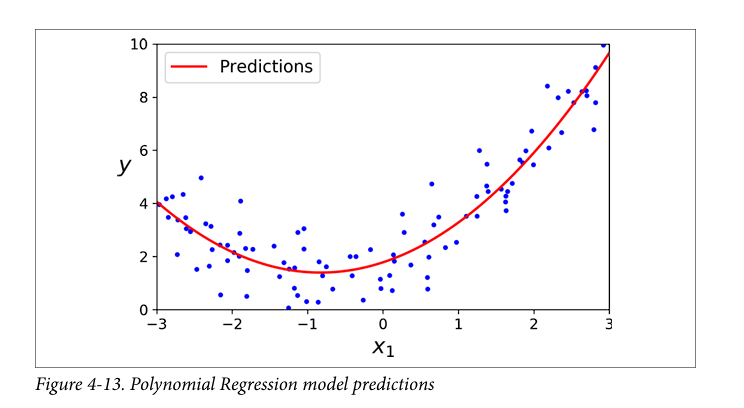

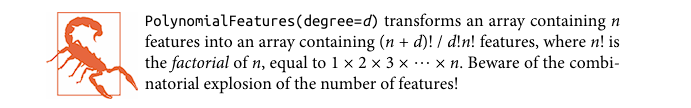

## Learning Curves

If we perform high-degree Polynomial Regression, we will likely to overfit the training data. The following figure shows a comparison between the predictions of a 300degree polynomial model, a simple linear regression model and a quadratic (or second degree polynomial) model.

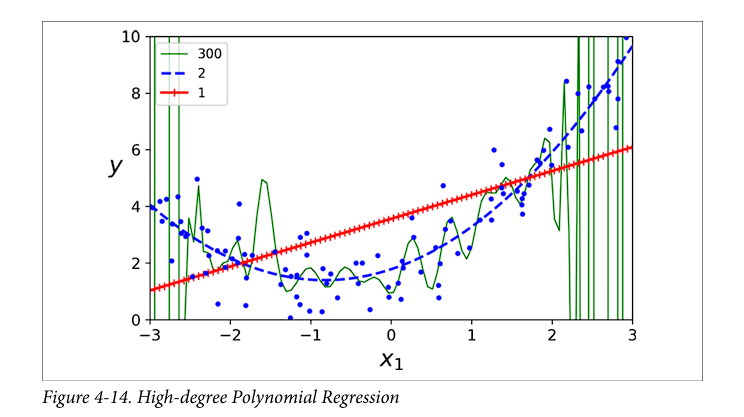

The higher degree Polynomial Regression model is severely overfitting the training data while linear model is uderfitting it. The model that will generalize the best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model.

But in general how can we decide how complex our model should be? How can we tell that our model is overfitting or underfitting the data?

This can be done using cross-validation to get an estimate of a model's generalization performance. But there is another way i.e., using **learning curves**. these are plots of the model's performance on the training set and the validation set as a function of the training set size. To generate the plots, train the model several times on different sized subsets of the training set. The following code shows it:

In [16]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  train_errors, test_errors =[],[]

  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_test_predict = model.predict(X_test)
    train_errors.append(mse(y_train[:m], y_train_predict))
    test_errors.append(mse(y_test, y_test_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
  plt.ylim(0,5)
  plt.legend()

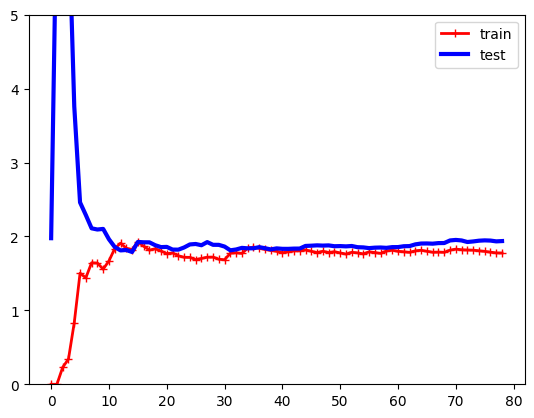

In [17]:
lr = LinearRegression()
plot_learning_curves(lr, X, y)

From the figure, above we can clearly see that as the number of instances in the training set increase the train_error also increase. But as the model is shown more training examples, it learns and thus the test error slowly goes down.

These learning curves are typical of a model that's underfitting. Both curves have reached a plateau: the are close and fairly high.

Now let's look at the learning curves of a 10th degree polynomial on the same data

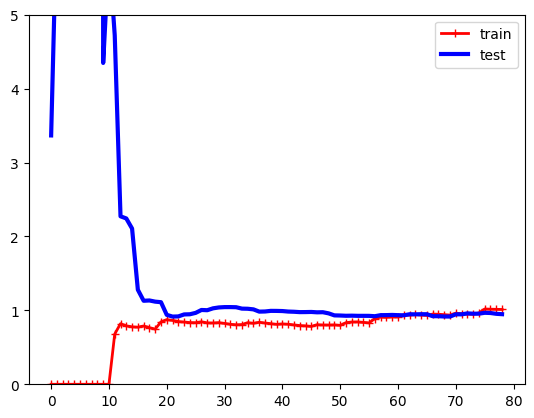

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

These learning curves look a bit like the previous ones, but there are two very important differneces:

* The error on the training data is much lower than with the Regression model.

* there is gap betwen the curves. THis means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you need a much larger training set, however the two curves would continue to get closer.


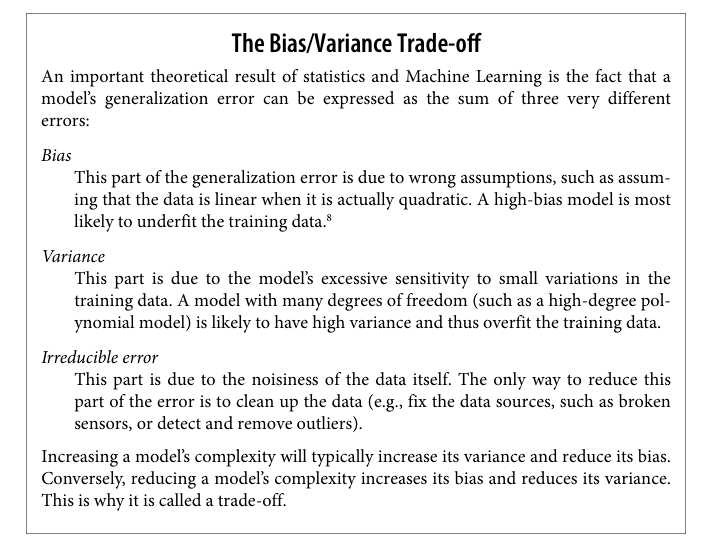

# Regularized Linear Models

A good way to reduce overfitting is to regularize the model: the fewer degrees of freedom it has, the harder it will for it to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

## Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized verion of Linear Regression: a regularization term equal to image.png is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

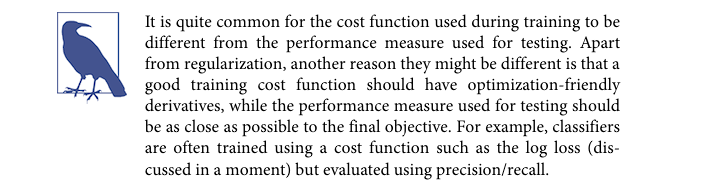

The hyperparameter α controls how much you want to regularize the model. If α = 0, then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat life going through the data's mean. Following is the equation for Ridge Regression Cost Function:

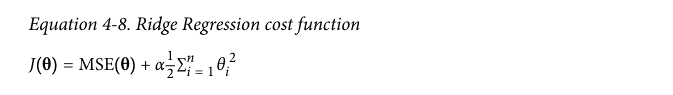

In [19]:
# code to perform Ridge Regression using Scikit-learn
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 1, solver="cholesky")
reg.fit(X,y)
reg.predict([[1.5]])

array([[4.77671377]])

In [20]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.74822915])

The penalty hyperparameter sets the type of regularization term touse. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the l2 norm of the weight vector: this is simply Ridge Regression.

## Lasso Regression

*Least Absolute Shrinkage and Selection Operatore Regression* (usually simply called *Lasso Regression* ) is another regularized version of the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm.

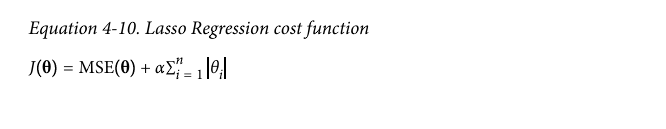

An import characterstic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero).

Here is a small Scikit-Learn example using the Lasso class:

In [21]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.72730397])

Note that you could instead use SGDRegressor(penalty='l1')

## Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. This regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

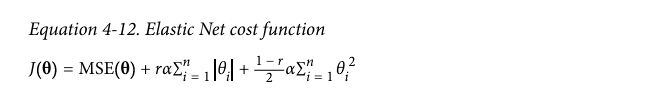

So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression, Ridge is a good default, but if you suspect that only a few features are useful,you should prefer Lasso or Elastic Net because They tend to reduce the useless Feature's weights down to zero, as we have discussed. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Here's a short example that uses Scikit-learn's ElasticNet (l1_ratio corresponds to the mix ratio r):

In [22]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.73115589])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping.

THe following figure shows a complex model being trained with Batch Gradient Descent. As the epochs go by the algorithm learns, and its predictions error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the trainin data. WIth early stopping you just stop training as soon as the validation error reaches the minimum. It is a such a simple and efficient regularization technique that Geoffrey Hinton called it is a "beautiful free lunch".

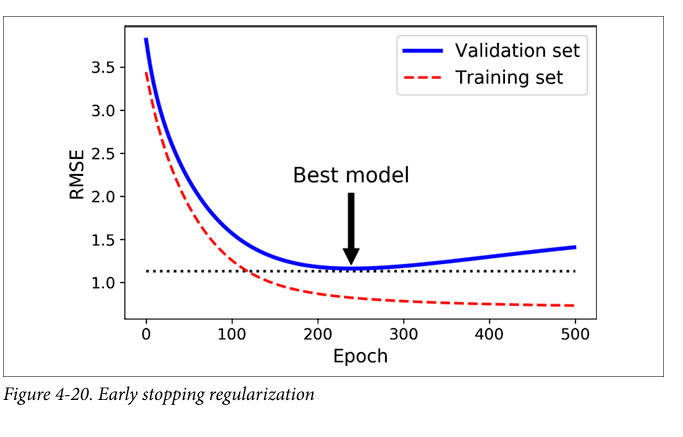

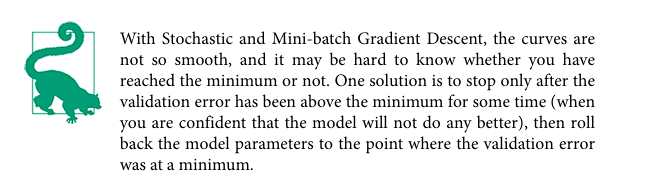

In [34]:
# Here's a basic implementation of early stopping:

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# prepare the data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_test)


In [61]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True,
                       penalty=None, learning_rate="constant",
                       eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_test, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

In [36]:
print("Best_epoch: ", best_epoch)
print("Best_model: ", best_model)

Best_epoch:  5
Best_model:  SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             warm_start=True)


Note that with warm_start = True, when the fit() method is called it continues training where it left off, isntead of testarting from scratch

# Logistic Regression

Logistic Regrssion is used for the classification taks, it estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called positive class, labeled "1") and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled "0"). This makes it a binary classifier.

## Training and Cost Function

The objective of training is to set the parameter vector 0 so that the model estimates high probabilities for positive instance (y=1) and low probabilities for a negative instances (y=0). This idea is captured by the cost function shown below for a single training instance X.

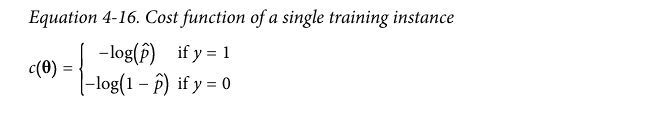

## Decision Boundaries

Let's use the iris dataset to illustrate Logistic Regression. This is a famous tataset that contains the sepal and petal lenght and width of 150 iris flowers of three different species: *Iris setosa, Iris versicolor, and IrisVirginica*.

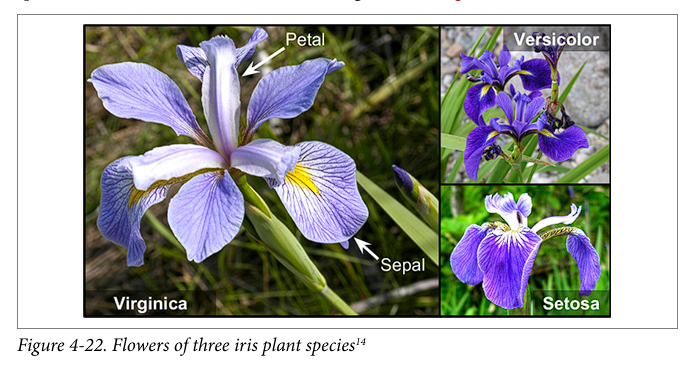

Let's try to biuld a classifier to detect the Iris Virginica type based only on the petal width feature. First let's load the data:

In [46]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [47]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [51]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype('int') # 1 if Iris virginica, else 0

In [52]:
# let's train a logistic regression model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

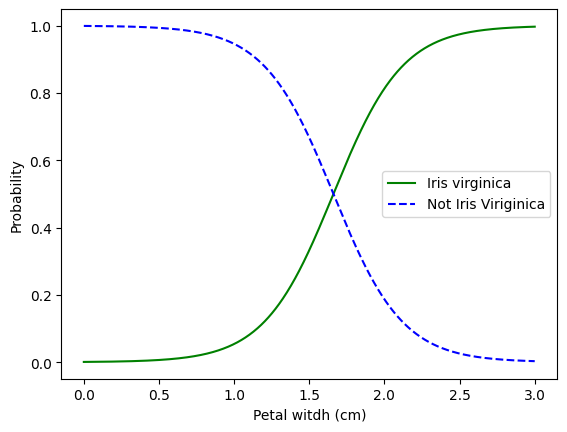

In [56]:
# Let's look at the model's estimated probabilities for flowers with petal
# width varying from 0cm to 3cm
X_new = np.linspace(0,3,1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris Viriginica")
plt.ylabel("Probability")
plt.xlabel("Petal witdh (cm)")
plt.legend()

The petal width of *Iris virginica* flowers ranges from 1.5cm to 3cm, while the other iris flower ranging from 0.1cm to 1.8 cm.

Above about 2cm the classifier is highly confident that the flower is an Iris viriginica while below 1 cm it is highly confident that the flower is not an iris virginica. In between these extremes, the calssifier is unsure. However, if you ask it to predict the class, it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.5cm where probabilities are equal to 50%.

In [57]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

Just like the other linear models, Logistic Regression models can be regularized using l1 or l2 penalties. Scikit-Learn actually adds an l2 penalty by default

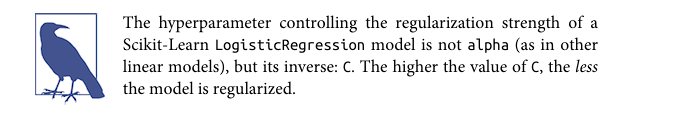

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called **Softmax Regression**, or **Multinomial Logistic Regression**.



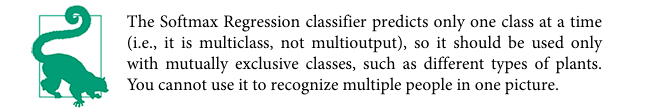

Let's use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn's LogisticRegression uses one-versus-the-rest by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to softmax Regression. You must also specify a solver that supports softmax regression, such as the "lbfgs" sover. It also applies l2 regularization by default, which you can control using the hyperparameter C:

In [58]:
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                 C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

so Next time we find an iris petals taht are 5cm long and 2 cm wide, we can ask our model to tell us what type of iris it is,

In [59]:
softmax_reg.predict([[5,2]])

array([2])

In [60]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])